<a href="https://colab.research.google.com/github/cshuler/CEE696_Deep/blob/master/my_first_regression_CKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Can we use DNN to do interpolation/regression? 

The objectives of this script are

- to get familiar with NN model construction
- to show DNN is not a magic or something but just a way of buiding an interpolation/regression function. Depending on our specific implementation, its performance can change dramatically.

Here we will sample 32 noisy points from a function $ y = f(x) = \sin(2\pi x) + 5 x $ and 

and will construct 1-32-32-1 layers 

(a single input x => 32 neuron layer => 32 neuron layer => a single output y)


Basically it is like we are constructing $W_1$, $W_2$, $W_3$ matrices to learn $f(x)$

$ y = W_3W_2(W_1x) \approx f(x)$

where 

$x$ is a single value representing the input $x$ of the above function

$W_1$ is a 32 x 1 matrix

$W_2$ is a 32 x 32 matrix

$W_3$ is a 1 x 32 matrix, 

$y$ is a single value representing the output $y$ of the function.

Note that I ignored activation functions and bias variables. With activation functions, 

$$ y = W_3\sigma_2(W_2\sigma_1(W_1x))$$ 





In [0]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential   # layer-by-layer model construction
from tensorflow.keras.layers import Dense # fully connected layer
from tensorflow.nn import sigmoid, relu   # activation functions

import matplotlib.pyplot as plt

In [190]:
print("numpy version:", np.__version__)
print("tensorflow version:", tf.__version__)

numpy version: 1.16.4
tensorflow version: 1.14.0


In [0]:
# Fix the random seed for reproducibility
np.random.seed(696007)
tf.set_random_seed(696007)

Here, we sample 32 points from 

$$ y = \sin(2\pi x) + 5 x $$

sine function (sin(2pi*x)) with a linear trend (5x)

In [0]:
def f(x):
    return np.sin(x*2*np.pi) + 5*x

In [0]:
# Training set and validation set
data = np.linspace(-1,1,3200)
fun = f(data) + .02 * ( np.random.randn(3200)) # add measurement error

val_data = np.linspace(-1,1,300)
val_fun = f(val_data)

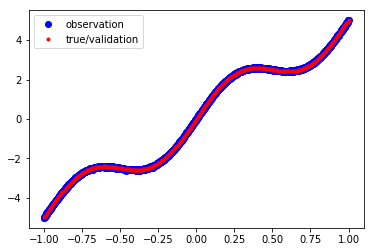

In [226]:
plt.figure()
plt.plot(data,fun,'bo',label='observation')
plt.plot(val_data,val_fun,'r.',label='true/validation')
plt.legend()


***So, using these 32 noisy observations, we will perform interpolation/regression using DNN!***


Below are helper functions for training progress and plotting results. We will see this later.

In [0]:
# Display training progress by printing a vertical bar for each completed epoch
class print_verticalbar(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: print(':(', end='')
    def on_train_end(self, logs):
        print('- Done!!')
        
def plot_prediction(data,fun,model):
    result = model.predict(data)
    plt.plot(data, fun, 'bo', label='observation')
    plt.plot(data, result, 'k+', label='DNN')
    plt.legend()

    data_curve = np.linspace(-1,1,512)
    result_curve = model.predict(data_curve)

    plt.figure()
    plt.plot(data_curve, f(data_curve), color = 'red', label='True')
    plt.plot(data_curve, result_curve, color = 'black', label='DNN interpolation')
    plt.legend()


Let's build our model. Your task is to create DNN model with input size of 1 and output size of 1 with hidden layers. You can start adding (`model.add`) a fully connected layer (`Dense`) with 32 neurons. Input size should be 1 because we are building $y = f(x)$ with a scalar $x$ and $y$. Then you can add another layer (`Dense`) of 32 neurons. Finally, you have to have output layer with 1 neuron (1 output for $y$). For activation function, `sigmoid` was used but you can use `relu`.

In [0]:
model = tf.keras.Sequential()
model.add(Dense(32,activation='relu',input_shape=(1,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd',loss='mse', metrics=['mse']) # We will learn this "sgd" optimization option later; Our loss function is mean squred error, i.e., 1/n*sum((data-predicted)**2)


model summary and plot

In [235]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_65 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_66 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 51        
Total params: 8,465
Trainable params: 8,465
Non-trainable params: 0
_________________________________________________________________


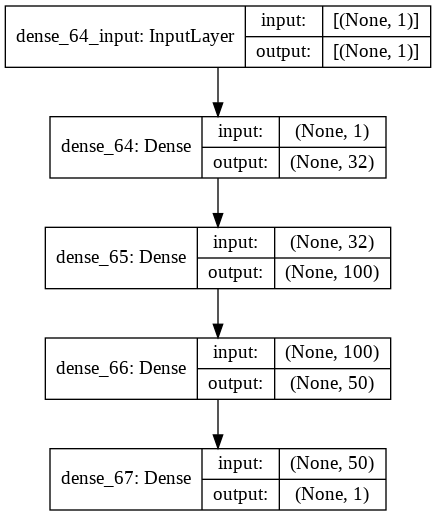

In [236]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model ,show_shapes=True, show_layer_names=True, to_file='model_plot.png')

In [237]:
# Since we don't have sparse data, just do overfitting using 200 iterations to see what happens. We will learn all the options later
history = model.fit(data,fun, epochs=200, validation_data=(val_data,val_fun), batch_size = 16, verbose = 0, callbacks=[print_verticalbar()])

:(:(:(:(:(:(:(:(:(:(:(:(:(:(:(:(:(:(:(:(- Done!!


Plot our interpolated result

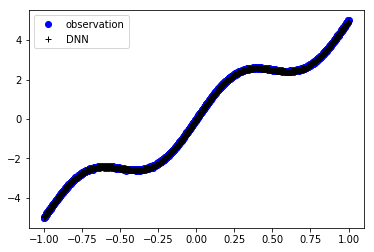

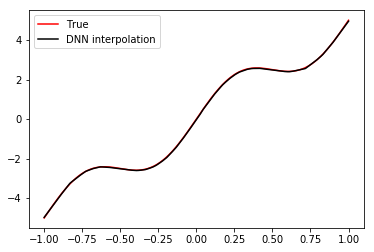

In [232]:

result = model.predict(data)
plt.plot(data, fun, 'bo', label='observation')
plt.plot(data, result, 'k+', label='DNN')
plt.legend()

data_curve = np.linspace(-1,1,512)
result_curve = model.predict(data_curve)

plt.figure()
plt.plot(data_curve, f(data_curve), color = 'red', label='True')
plt.plot(data_curve, result_curve, color = 'black', label='DNN interpolation')
plt.legend()

In [177]:
print(history.history.keys())
print("min {}".format(min(history.history['mean_squared_error'])))

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])
min 0.39500612020492554


Training history visualization


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


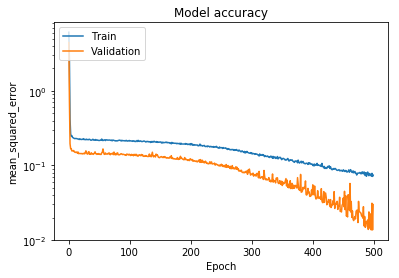

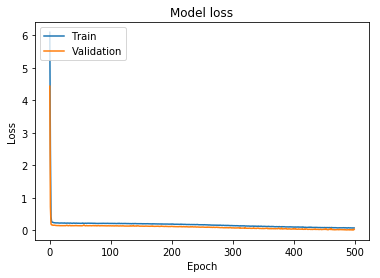

In [160]:
print(history.history.keys())


# Plot training & validation accuracy values
plt.semilogy(history.history['mean_squared_error'])
plt.semilogy(history.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


Q) So, our interporlation/regression result is somewhat disappointing. How can you improve it?




# Extra

You can use Pandas to tabularize training progress.







In [161]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10) # the last 10 rows

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
490,0.081514,0.081514,0.018578,0.018578,490
491,0.075725,0.075725,0.013883,0.013883,491
492,0.072901,0.072901,0.023844,0.023844,492
493,0.077955,0.077955,0.014522,0.014522,493
494,0.076324,0.076324,0.022462,0.022462,494
495,0.075293,0.075293,0.013899,0.013899,495
496,0.071820,0.071820,0.013708,0.013708,496
497,0.078409,0.078409,0.031180,0.031180,497
498,0.071287,0.071287,0.013679,0.013679,498
499,0.074217,0.074217,0.029871,0.029871,499


### Do you want check RAM and CPU info on the remote machine?

In [91]:
# memory
#!free -h
# or 
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [0]:
# CPU 
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

- check CPG/GPU specifications using tensorflow


In [162]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11952356972443976113, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9038816095095133414
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6486114244847928336
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330053735
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15230650201795677820
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]